In [66]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import regularizers

## EarthML TensorFlow Exercise Notebook 1: Linear Regression Workflow


Please submit this notebook after completion. You are encouraged to further experiment by yourself. Instructions in this notebook are just to guide you further on your learning.

---

### Exercise 1: Linear Regression

1.1. Generate a dataset with 100 data points for linear regression using the equation ($
y = x^3 - 5x^2 + 4x - 7 $ ) , where `x` is a random number between 1 and 10 (This is an arbitrary choice).

Add some Gaussian noise to the output.

1.2. Split the dataset into training and testing sets (80% train and 20% test).

1.3. Implement a linear regression model in TensorFlow to predict `y` based on `x`.

1.4. Train your model and visualize the loss reduction.

1.5. Test your model on the test set and visualize the predicted line against the real data.

---

In [67]:
def gen_data(n,range_start,range_end,y_func):
    y=[]
    input=[]
    for i in range(n):
        x=np.random.uniform(range_start,range_end) 
        input.append(x)
        y.append(y_func(x))
    return input, y    

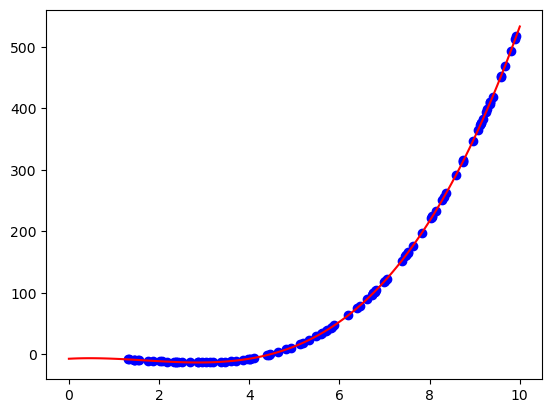

In [68]:
def y_1(x):
    return x**3 - 5*x**2 + 4*x - 7
x_in=np.linspace(0,10,100)
y_in=y_1(x_in)
x,y=gen_data(100,1,10,y_1)
plt.plot(x,y,'o',color='blue')
plt.plot(x_in,y_in, color='red')
plt.show()

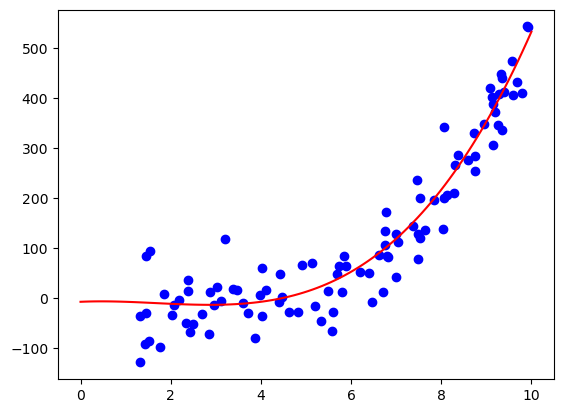

In [69]:
noise=np.random.normal(scale=50,size=100)
y=y+noise
plt.plot(x,y,'o',color='blue')
plt.plot(x_in,y_in, color='red')
plt.show()

In [70]:
df = pd.DataFrame({
    'x': x,
    'y': y})
df

,x,y
0,1.759210,-97.556685
1,7.632049,135.584017
2,8.058911,201.306273
3,9.577473,475.232452
4,5.135463,70.673140
...,...,...
95,3.205527,118.455706
96,8.038332,137.560847
97,5.194583,-15.809044
98,9.348042,440.028991


In [71]:
train= df.sample(frac=0.8)
test= df.drop(train.index)

In [72]:
model=tf.keras.Sequential([tf.keras.layers.Dense(1,input_shape=(1,))])
model.summary()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1),
    loss=tf.keras.losses.MeanAbsoluteError())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [73]:
history=model.fit(train['x'],train['y'],epochs=200,verbose=1,validation_split=0.3)

Epoch 1/200
2/2 [==============================] - 0s 88ms/step - loss: 142.4170 - val_loss: 90.3813
Epoch 2/200
2/2 [==============================] - 0s 24ms/step - loss: 136.4255 - val_loss: 83.4115
Epoch 3/200
2/2 [==============================] - 0s 20ms/step - loss: 129.0057 - val_loss: 78.5024
Epoch 4/200
2/2 [==============================] - 0s 22ms/step - loss: 124.8316 - val_loss: 74.8470
Epoch 5/200
2/2 [==============================] - 0s 24ms/step - loss: 119.2353 - val_loss: 72.1291
Epoch 6/200
2/2 [==============================] - 0s 24ms/step - loss: 115.3284 - val_loss: 71.1736
Epoch 7/200
2/2 [==============================] - 0s 21ms/step - loss: 111.6986 - val_loss: 70.8590
Epoch 8/200
2/2 [==============================] - 0s 24ms/step - loss: 109.1400 - val_loss: 70.7390
Epoch 9/200
2/2 [==============================] - 0s 23ms/step - loss: 108.2805 - val_loss: 71.9123
Epoch 10/200
2/2 [==============================] - 0s 26ms/step - loss: 107.5301 - val_los

In [74]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,val_loss,epoch
195,70.463661,55.113159,195
196,70.343231,55.066792,196
197,70.310394,55.205933,197
198,70.316940,55.162125,198
199,70.444572,55.424973,199


In [75]:
loss=model.evaluate(test['x'],test['y']) 

1/1 [==============================] - 0s 20ms/step - loss: 85.5387


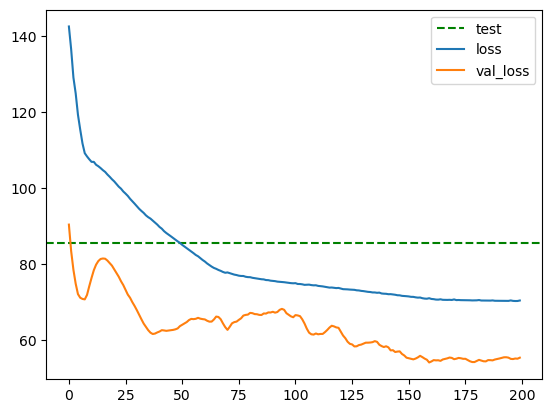

In [76]:
plt.axhline(loss,color='g',linestyle='--',label='test')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 33ms/step


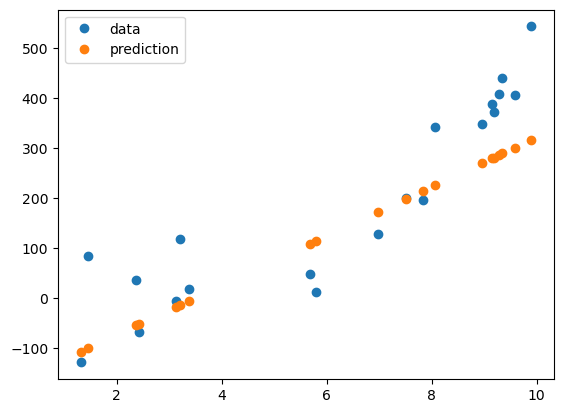

In [77]:
y_predict=model.predict(test['x'])
plt.plot(test['x'],test['y'],'o',label='data')
plt.plot(test['x'],y_predict,'o',label='prediction')
plt.legend()
plt.show()

4/4 [==============================] - 0s 1ms/step


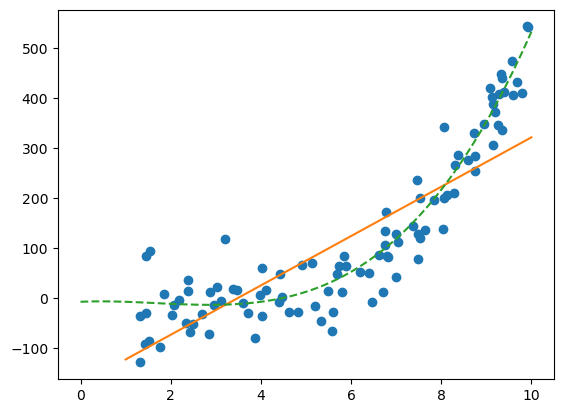

In [78]:
t=np.linspace(1,10,100).reshape(-1,1)
line=model.predict(t)
plt.plot(df['x'],df['y'],'o')
plt.plot(t,line)
plt.plot(x_in,y_in,linestyle='--')
plt.show()

---
### Exercise 2: Overfitting and Underfitting

2.1. Generate a dataset with a quadratic relationship, for instance \(y = x^2 + 2x + 3\). Add Gaussian noise to the output.

2.2. Split the dataset into training and testing sets.

2.3. Train a simple linear model on the dataset and visualize the predictions.

2.4. Now, implement a polynomial regression model of degree 2 and train it on the dataset.

2.5. Compare the performance of the linear model and the polynomial model. Which one underfits? Which one is just right?

2.6. Now, try a polynomial regression of degree 10. What do you observe regarding overfitting?

---

2.6 da sorun yaşadım. model başta oluşturduğum datatyı normalize edip vermediğim sürece çok yüksek hatalar hesplıyor x in yüksek kuvvetlerinden ötürü. Farklı loss functıonları ve learning rateleri denedim hatta L2 regularızatıonu da bu kısımda denedim ama yalnızca normalize edilmiş data verdiğim zaman model düzgün çalışıyor. o yüzden overfit olmasını da sağlayamadım orijinal datayla bunu nasıl sağlayabilirim.   

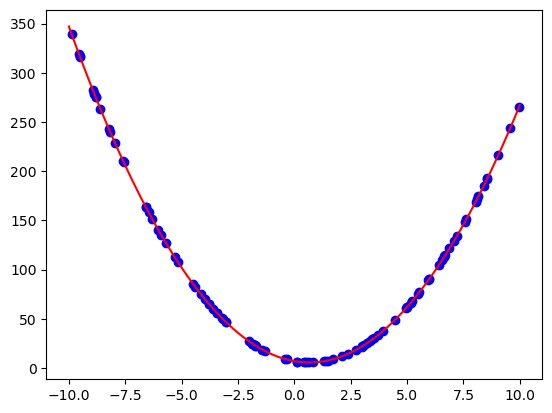

In [79]:
def y_2(x):
    return 3*x**2- 4*x+ 7
x_in2=np.linspace(-10,10,100)
y_in2=y_2(x_in2)
x2,y2=gen_data(100,-10,10,y_2)
plt.plot(x2,y2,'o',color='blue')
plt.plot(x_in2,y_in2, color='red')
plt.show()

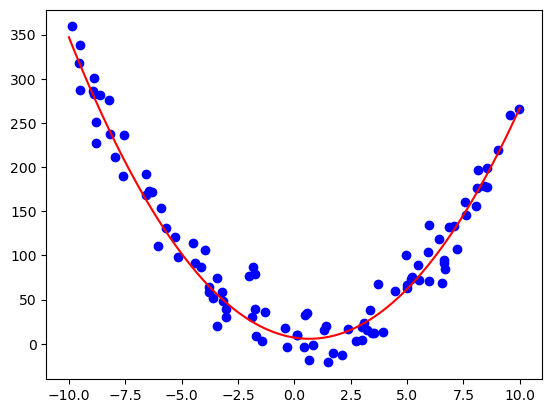

In [80]:
noise=np.random.normal(scale=20,size=100)
y2=y2+noise
plt.plot(x2,y2,'o',color='blue')
plt.plot(x_in2,y_in2, color='red')
plt.show()

In [81]:
df2 = pd.DataFrame({
    'x': x2,
    'y': y2})
df2
train= df2.sample(frac=0.8)
test= df2.drop(train.index)
model2=tf.keras.Sequential([tf.keras.layers.Dense(1,input_shape=(1,))])
model2.summary()
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1),
    loss=tf.keras.losses.MeanAbsoluteError())
history2=model2.fit(train['x'],train['y'],epochs=200,verbose=0,validation_split=0.3)


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


4/4 [==============================] - 0s 820us/step


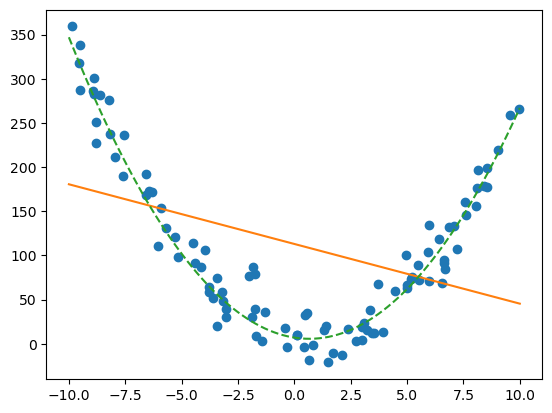

In [82]:
t=np.linspace(-10,10,100).reshape(-1,1)
line=model2.predict(t)
plt.plot(df2['x'],df2['y'],'o')
plt.plot(t,line)
plt.plot(x_in2,y_in2,linestyle='--')
plt.show()

POLYNOMIAL REGRESSION

In [83]:
x_sqr=[i**2 for i in x2]
df2_poly=pd.DataFrame({
    'x1': x2,
    'x2': x_sqr,
    'y' : y2})

In [84]:
train= df2_poly.sample(frac=0.8)
test2= df2_poly.drop(train.index)
model2_poly=tf.keras.Sequential([tf.keras.layers.Dense(1,input_shape=(2,))])
model2_poly.summary()
model2_poly.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.4),
    loss=tf.keras.losses.MeanAbsoluteError())
poly_history=model2_poly.fit(train.drop(columns=['y']),train['y'],epochs=200,validation_split=0.3)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
2/2 [==============================] - 0s 84ms/step - loss: 124.5982 - val_loss: 92.7525
Epoch 2/200
2/2 [==============================] - 0s 20ms/step - loss: 98.0551 - val_loss: 67.1154
Epoch 3/200
2/2 [==============================] - 0s 22ms/step - loss: 71.6193 - val_loss: 42.4903
Epoch 4/200
2/2 [==============================] - 0s 21ms/step - loss: 46.5491 - val_loss: 21.4006
Epoch 5/200
2/2 [==============================] - 0s 22ms/step - loss: 24.7968 - val_loss: 21.2505
Epoch 6/200
2/2 [==============================] - 0s 20ms/step - loss: 22.5271 - val_

4/4 [==============================] - 0s 1ms/step


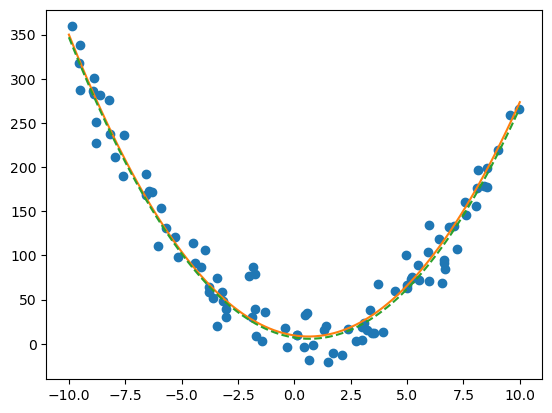

In [85]:
t=[[x,x**2] for x in np.linspace(-10,10,100)]
line=model2_poly.predict(t)
plt.plot(df2_poly['x1'],df2_poly['y'],'o')
plt.plot([i[0] for i in t],line)
plt.plot(x_in2,y_in2,linestyle='--')
plt.show()

In [86]:
loss_linear=model2.evaluate(test['x'],test['y'])
loss_quadratic=model2_poly.evaluate(test2.drop(columns=['y']),test2['y'])


1/1 [==============================] - 0s 17ms/step - loss: 18.0715


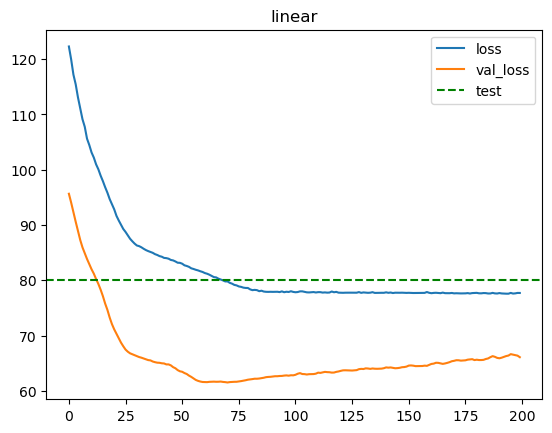

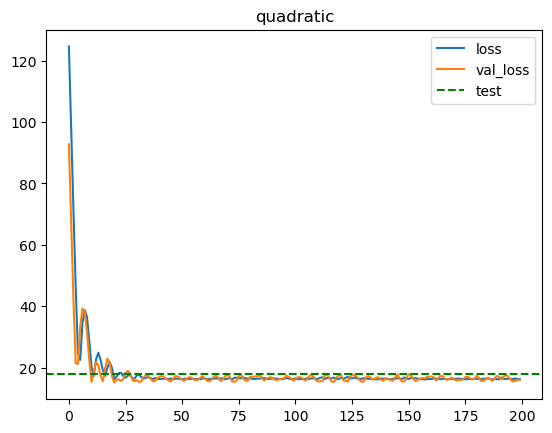

In [87]:
plt.plot(history2.history['loss'],label='loss')
plt.plot(history2.history['val_loss'],label='val_loss')
plt.title('linear')
plt.axhline(loss_linear,color='g',linestyle='--',label='test')
plt.legend()
plt.show()
plt.plot(poly_history.history['loss'],label='loss')
plt.plot(poly_history.history['val_loss'],label='val_loss')
plt.title('quadratic')
plt.axhline(loss_quadratic,color='g',linestyle='--',label='test')
plt.legend()
plt.show()

linear model underfits 

2.6 da yaşadığım sorun burdan itibaren başlıyor.

In [88]:
def poly_datagen(n,x,y=None):
    df=pd.DataFrame({})
    for i in range(1,n+1):
        df[i]=[j**i for j in x]
    df['y']=y    
    return df

In [127]:
n=10
df3=poly_datagen(n,x2,y2)

In [128]:
df3

,1,2,3,4,5,6,7,8,9,10,y
0,-3.970625,15.765861,-62.600317,248.562365,-986.947873,3918.799633,-1.556008e+04,6.178325e+04,-2.453181e+05,9.740661e+05,106.609760
1,2.128686,4.531306,9.645730,20.532735,43.707754,93.040105,1.980532e+02,4.215932e+02,8.974397e+02,1.910368e+03,-12.214299
2,-9.878333,97.581459,-963.942130,9522.141171,-94062.879569,929184.429682,-9.178793e+06,9.067117e+07,-8.956800e+08,8.847825e+09,359.211984
3,5.539752,30.688854,170.008645,941.805756,5217.370467,28902.939288,1.601151e+05,8.869981e+05,4.913750e+06,2.722095e+07,71.914510
4,-1.317626,1.736139,-2.287583,3.014180,-3.971563,5.233037,-6.895188e+00,9.085282e+00,-1.197101e+01,1.577332e+01,35.487533
...,...,...,...,...,...,...,...,...,...,...,...
95,6.397666,40.930124,261.857244,1675.275059,10717.849484,68569.216096,4.386829e+05,2.806547e+06,1.795535e+07,1.148723e+08,118.680991
96,-9.510218,90.444242,-860.144441,8180.160959,-77795.112219,739848.459604,-7.036120e+06,6.691503e+07,-6.363765e+08,6.052079e+09,338.666847
97,-0.424662,0.180338,-0.076583,0.032522,-0.013811,0.005865,-2.490616e-03,1.057671e-03,-4.491531e-04,1.907385e-04,18.085362
98,-8.814124,77.688782,-684.758553,6035.546790,-53198.057725,468894.276554,-4.132892e+06,3.642783e+07,-3.210794e+08,2.830033e+09,250.724726


In [107]:
train= df3.sample(frac=0.8)
test= df3.drop(train.index)

bu modelde aynı 3. kısımda olduğu gibi normalizer vardı o şekilde düzgün sonuç alıyorum ama şuan olduğu haliyle neden çalışmadığını anlamadım.  

In [110]:
model3=tf.keras.Sequential([tf.keras.layers.Dense(1,input_shape=(n,))])
model3.summary()
model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.4),
    loss=tf.keras.losses.MeanSquaredError())
history3=model3.fit(train.drop(columns=['y']),train['y'],
                    epochs=500,verbose=1,validation_split=0.2)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0


_________________________________________________________________
Epoch 1/500
2/2 [==============================] - 0s 95ms/step - loss: 323153030113394688.0000 - val_loss: 94609238948577280.0000
Epoch 2/500
2/2 [==============================] - 0s 23ms/step - loss: 106067876686856192.0000 - val_loss: 525682041157582848.0000
Epoch 3/500
2/2 [==============================] - 0s 21ms/step - loss: 318112422135070720.0000 - val_loss: 216004677093818368.0000
Epoch 4/500
2/2 [==============================] - 0s 21ms/step - loss: 75071930935279616.0000 - val_loss: 53060927917916160.0000
Epoch 5/500
2/2 [==============================] - 0s 21ms/step - loss: 156994042649903104.0000 - val_loss: 215545630989221888.0000
Epoch 6/500
2/2 [==============================] - 0s 21ms/step - loss: 166187952722935808.0000 - val_loss: 23395578067025920.0000
Epoch 7/500
2/2 [==============================] - 0s 21ms/step - loss: 17290665381593088.0000 - val_loss: 105820005534269440.0000
Epoch 8/500
2/2

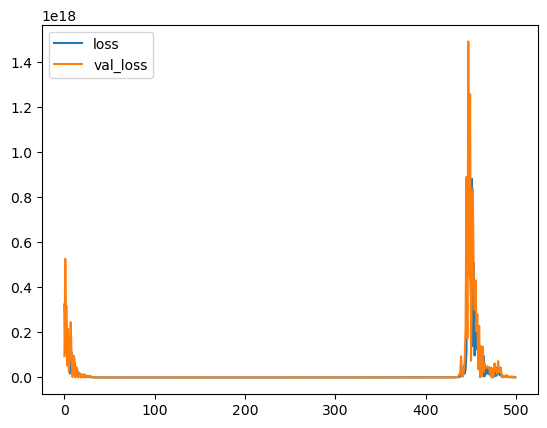

In [111]:
plt.plot(history3.history['loss'],label='loss')
plt.plot(history3.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [114]:
t=[[i**j for j in range(1,11)] for i in np.linspace(-10,10,100)]

4/4 [==============================] - 0s 1ms/step


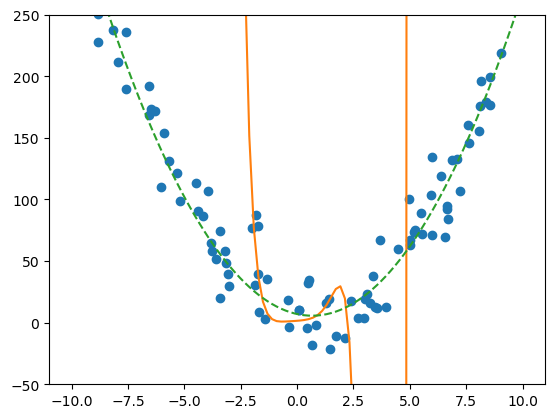

In [116]:
line=model3.predict(t)
plt.plot(df2_poly['x1'],df2_poly['y'],'o')
plt.plot([i[0] for i in t],line)
plt.ylim(-50,250)
plt.plot(x_in2,y_in2,linestyle='--')
plt.show()

loss 2000 epoch sonra dahi buna benzer değğerlerde sabitleniyor daha fazla azaltmak için ne yapmak gerek. 

In [117]:
model3.evaluate(test.drop(columns=['y']),test['y'])

1/1 [==============================] - 0s 17ms/step - loss: 2167533629079552.0000


2167533629079552.0

---
### Exercise 3: Regularization

3.1. Continuing from the previous exercise, add L2 regularization to the polynomial regression model of degree 10.

3.2. Train the model and compare its performance with the unregularized degree 10 model. What do you observe?

3.3. Experiment with different regularization strengths. How does the strength of regularization affect the model?

---

In [ ]:
train= df3.sample(frac=0.8)
test= df3.drop(train.index)
L2=regularizers.L2
train_features=train.drop(columns=['y'])
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(np.array(train_features))

In [119]:
modelL2=tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=(n,)),
                            normalizer,tf.keras.layers.Dense(1,
                            kernel_regularizer=L2(1e-2))])
modelL2.summary()
modelL2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.5),
    loss=tf.keras.losses.MeanSquaredError())
history=modelL2.fit(train.drop(columns=['y']),train['y'],epochs=500,verbose=1,validation_split=0.1)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 10)               21        
 ion)                                                            
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 32
Trainable params: 11
Non-trainable params: 21
_________________________________________________________________


Epoch 1/500
3/3 [==============================] - 0s 53ms/step - loss: 21183.3223 - val_loss: 21254.1602
Epoch 2/500
3/3 [==============================] - 0s 11ms/step - loss: 19683.9336 - val_loss: 18428.6699
Epoch 3/500
3/3 [==============================] - 0s 11ms/step - loss: 18095.5234 - val_loss: 16514.8320
Epoch 4/500
3/3 [==============================] - 0s 11ms/step - loss: 16708.8184 - val_loss: 14766.9316
Epoch 5/500
3/3 [==============================] - 0s 11ms/step - loss: 15656.7676 - val_loss: 13086.6709
Epoch 6/500
3/3 [==============================] - 0s 11ms/step - loss: 14654.5938 - val_loss: 11710.0381
Epoch 7/500
3/3 [==============================] - 0s 11ms/step - loss: 13721.9951 - val_loss: 10667.9688
Epoch 8/500
3/3 [==============================] - 0s 11ms/step - loss: 12955.8154 - val_loss: 9860.4678
Epoch 9/500
3/3 [==============================] - 0s 12ms/step - loss: 12331.5557 - val_loss: 9286.0430
Epoch 10/500
3/3 [==============================

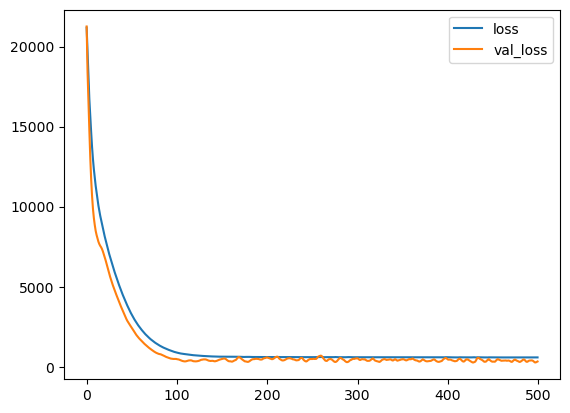

In [120]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [121]:
t=[[i**j for j in range(1,11)] for i in np.linspace(-15,15,100)]

4/4 [==============================] - 0s 748us/step
[-15.0, 225.0, -3375.0, 50625.0, -759375.0, 11390625.0, -170859375.0, 2562890625.0, -38443359375.0, 576650390625.0]
(100, 1)


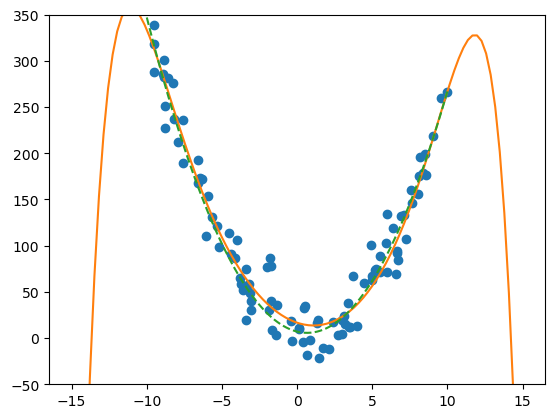

In [124]:

line=modelL2.predict(t)
print(t[0])
print(line.shape)
plt.plot(df2_poly['x1'],df2_poly['y'],'o')
plt.plot([i[0] for i in t],line)
plt.ylim(-50,350)
plt.plot(x_in2,y_in2,linestyle='--')
plt.show()

In [125]:
modelL2.evaluate(test.drop(columns=['y']),test['y'])

1/1 [==============================] - 0s 17ms/step - loss: 323.5751


323.5750732421875

---
### Exercise 4: Activation and Cost Functions

4.1. Define and visualize the following activation functions: Sigmoid, ReLU, and Tanh. Describe their main properties and potential use cases.

4.2. Implement a simple feed-forward neural network in TensorFlow for a binary classification problem. Use the sigmoid activation function for the output layer.

4.3. Generate a toy binary classification dataset and train your neural network on it.

4.4. Replace the sigmoid activation function in the hidden layers with ReLU and compare the performances. Which one trains faster?

4.5. Experiment with different cost functions such as Mean Squared Error (MSE) and Cross-Entropy. What are their differences and which one is more suitable for the given problem?

---

In [ ]:
test